# Lab assignment №1, optional part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

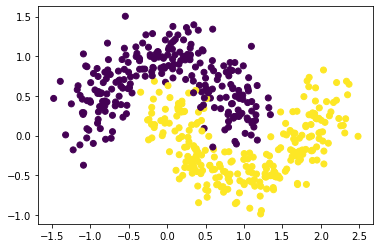

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(moons_points, moons_labels, 
                                                    test_size=0.2, 
                                                    random_state=7576)

In [7]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(400, 2) (400,) (100, 2) (100,)


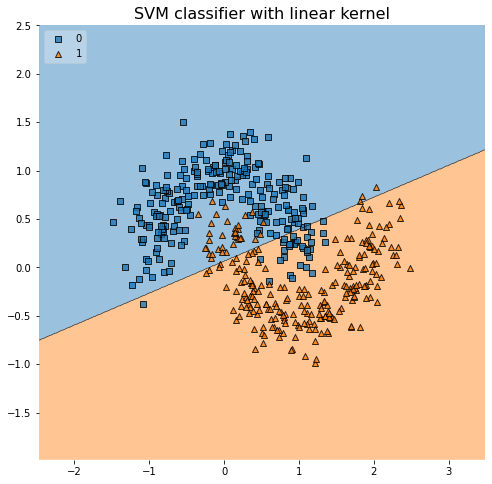

Score of SVM classifier with linear kernel: 0.88


In [8]:
svm = SVC(kernel='linear')
_ = svm.fit(x_train, y_train)


plt.figure(figsize = (8, 8))
fig = plot_decision_regions(X = moons_points, y = moons_labels, clf = svm, legend=2)
plt.title('SVM classifier with linear kernel', fontsize=16) 
plt.show()
print(f'Score of SVM classifier with linear kernel: {svm.score(x_test, y_test)}')

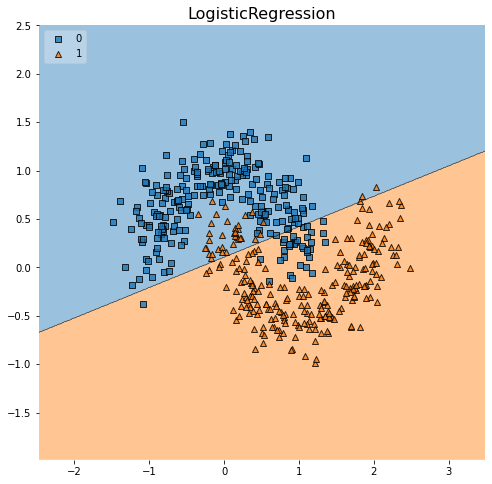

Score of LogisticRegression: 0.87


In [9]:
lr = LogisticRegression(random_state=42, 
                        class_weight=None,
                        solver='saga', max_iter = 500)
_ = lr.fit(x_train, y_train)


plt.figure(figsize = (8, 8))
fig = plot_decision_regions(X = moons_points, y = moons_labels, clf = lr, legend=2)
plt.title('LogisticRegression', fontsize=16) 
plt.show()
print(f'Score of LogisticRegression: {lr.score(x_test, y_test)}')

We divided the data quite well, but not perfectly

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

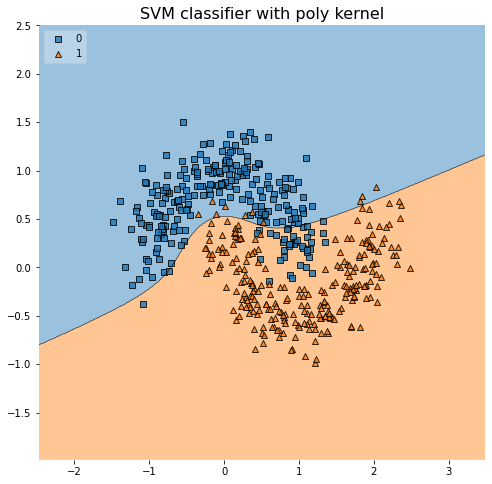

Score of SVM classifier with poly kernel: 0.89


In [10]:
svm = SVC(kernel='poly')
_ = svm.fit(x_train, y_train)


plt.figure(figsize = (8, 8))
fig = plot_decision_regions(X = moons_points, y = moons_labels, clf = svm, legend=2)
plt.title('SVM classifier with poly kernel', fontsize=16) 
plt.show()
print(f'Score of SVM classifier with poly kernel: {svm.score(x_test, y_test)}')

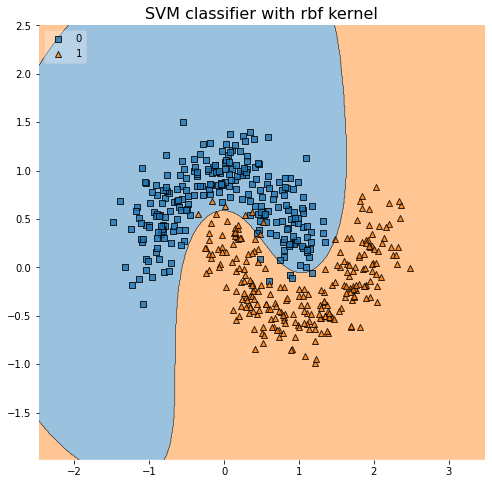

Score of SVM classifier with rbf kernel: 0.98


In [11]:
svm = SVC(kernel='rbf')
_ = svm.fit(x_train, y_train)


plt.figure(figsize = (8, 8))
fig = plot_decision_regions(X = moons_points, y = moons_labels, clf = svm, legend=2)
plt.title('SVM classifier with rbf kernel', fontsize=16) 
plt.show()
print(f'Score of SVM classifier with rbf kernel: {svm.score(x_test, y_test)}')

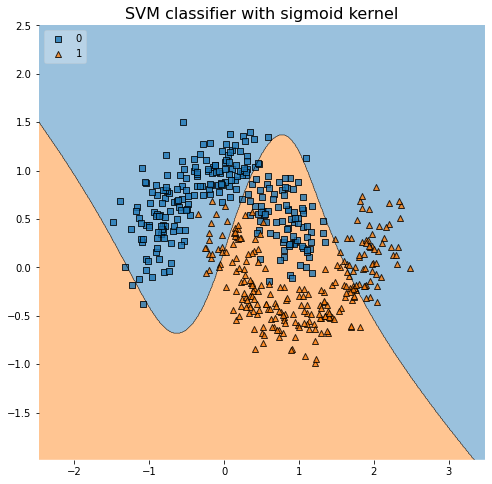

Score of SVM classifier with sigmoid kernel: 0.63


In [12]:
svm = SVC(kernel='sigmoid')
_ = svm.fit(x_train, y_train)


plt.figure(figsize = (8, 8))
fig = plot_decision_regions(X = moons_points, y = moons_labels, clf = svm, legend=2)
plt.title('SVM classifier with sigmoid kernel', fontsize=16) 
plt.show()
print(f'Score of SVM classifier with sigmoid kernel: {svm.score(x_test, y_test)}')

In [14]:
for i in range(1, 6, 1):
    svm = SVC(kernel='poly',degree = i)
    _ = svm.fit(x_train, y_train)
    print(f'Score of SVM classifier with sigmoid kernel and degree {i}: {svm.score(x_test, y_test)}')

Score of SVM classifier with sigmoid kernel and degree 1: 0.88
Score of SVM classifier with sigmoid kernel and degree 2: 0.75
Score of SVM classifier with sigmoid kernel and degree 3: 0.89
Score of SVM classifier with sigmoid kernel and degree 4: 0.67
Score of SVM classifier with sigmoid kernel and degree 5: 0.81


In [15]:
for i in range(1, 6, 1):
    svm = SVC(kernel='rbf',degree = i)
    _ = svm.fit(x_train, y_train)
    print(f'Score of SVM classifier with rbf kernel and degree {i}: {svm.score(x_test, y_test)}')

Score of SVM classifier with rbf kernel and degree 1: 0.98
Score of SVM classifier with rbf kernel and degree 2: 0.98
Score of SVM classifier with rbf kernel and degree 3: 0.98
Score of SVM classifier with rbf kernel and degree 4: 0.98
Score of SVM classifier with rbf kernel and degree 5: 0.98


In [16]:
for i in range(1, 6, 1):
    svm = SVC(kernel='sigmoid',degree = i)
    _ = svm.fit(x_train, y_train)
    print(f'Score of SVM classifier with sigmoid kernel and degree {i}: {svm.score(x_test, y_test)}')

Score of SVM classifier with sigmoid kernel and degree 1: 0.63
Score of SVM classifier with sigmoid kernel and degree 2: 0.63
Score of SVM classifier with sigmoid kernel and degree 3: 0.63
Score of SVM classifier with sigmoid kernel and degree 4: 0.63
Score of SVM classifier with sigmoid kernel and degree 5: 0.63


* The quality of the classification with the kernel !rbf! is almost perfect - 0.98, but the level does not give any increase. Although this is the ideal.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [22]:
for degree in range(2, 11, 2):
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    lr = LogisticRegression(random_state=42, 
                        class_weight=None,
                        solver='saga', max_iter = 1000)
    _ = lr.fit(x_train_poly, y_train)
    print(f'Score of LogisticRegression with degree {degree}: {lr.score(x_test_poly, y_test)}')


Score of LogisticRegression with degree 2: 0.85
Score of LogisticRegression with degree 4: 0.98
Score of LogisticRegression with degree 6: 0.96
Score of LogisticRegression with degree 8: 0.87
Score of LogisticRegression with degree 10: 0.85


* LogisticRegression with a degree of 4  gives that almost perfect result!

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

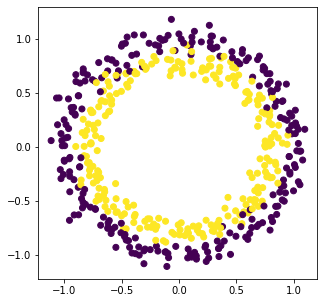

In [23]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(circles_points, circles_labels, 
                                                    test_size=0.3, 
                                                    random_state=7576)

In [25]:
for i in range(1, 6):
    svm = SVC(kernel='rbf',degree = i)
    _ = svm.fit(x_train, y_train)
    print(f'Score of SVM classifier with rbf kernel and degree {i}: {svm.score(x_test, y_test)}')

Score of SVM classifier with rbf kernel and degree 1: 0.9533333333333334
Score of SVM classifier with rbf kernel and degree 2: 0.9533333333333334
Score of SVM classifier with rbf kernel and degree 3: 0.9533333333333334
Score of SVM classifier with rbf kernel and degree 4: 0.9533333333333334
Score of SVM classifier with rbf kernel and degree 5: 0.9533333333333334


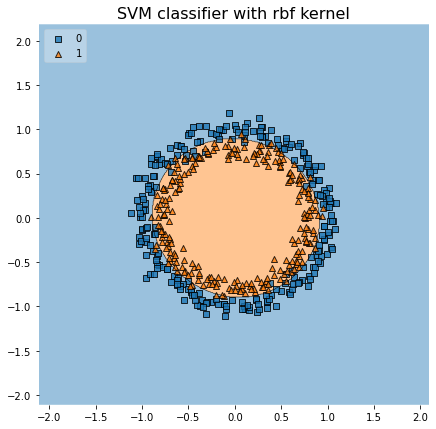

In [26]:
plt.figure(figsize = (7, 7))
fig = plot_decision_regions(X = circles_points, y = circles_labels, clf = svm, legend=2)
plt.title('SVM classifier with rbf kernel', fontsize=16) 
plt.show()

In [28]:
for degree in range(2, 6):
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    lr = LogisticRegression(random_state=42, 
                        class_weight=None,
                        solver='saga', max_iter = 1000)
    _ = lr.fit(x_train_poly, y_train)
    print(f'Score of LogisticRegression with degree {degree}: {lr.score(x_test_poly, y_test)}')

Score of LogisticRegression with degree 2: 0.96
Score of LogisticRegression with degree 3: 0.9466666666666667
Score of LogisticRegression with degree 4: 0.9466666666666667
Score of LogisticRegression with degree 5: 0.9466666666666667


* Interesting, LogisticRegression with degree 2 gives best accuracy 0.96, then SVM classifier with any degree gives 0.95

And even more:

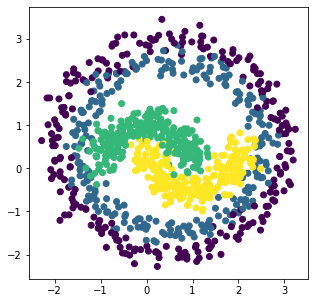

In [29]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(points, labels, 
                                                    test_size=0.3, 
                                                    random_state=7576)

Score of SVM classifier with rbf kernel and degree 1: 0.9033333333333333
Score of SVM classifier with rbf kernel and degree 2: 0.9033333333333333
Score of SVM classifier with rbf kernel and degree 3: 0.9033333333333333
Score of SVM classifier with rbf kernel and degree 4: 0.9033333333333333
Score of SVM classifier with rbf kernel and degree 5: 0.9033333333333333


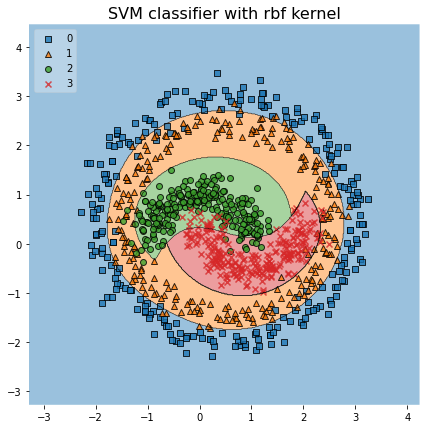

In [31]:
for i in range(1, 6):
    svm_ = SVC(kernel='rbf',degree = i)
    _ = svm_.fit(x_train, y_train)
    print(f'Score of SVM classifier with rbf kernel and degree {i}: {svm_.score(x_test, y_test)}')
plt.figure(figsize = (7, 7))
fig = plot_decision_regions(X = points, y = labels, clf = svm_, legend=2)
plt.title('SVM classifier with rbf kernel', fontsize=16) 
plt.show()

In [35]:
for degree in range(2, 7, 2):
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    lr = LogisticRegression(random_state=42, 
                            class_weight=None,
                            multi_class='multinomial',
                            solver='saga',
                            max_iter = 1000)
    _ = lr.fit(x_train_poly, y_train)
    print(f'Score of LogisticRegression with degree {degree}: {lr.score(x_test_poly, y_test)}')

Score of LogisticRegression with degree 2: 0.8666666666666667
Score of LogisticRegression with degree 4: 0.91
Score of LogisticRegression with degree 6: 0.79


* And again LogisticRegression win! with degree 4 gives best accuracy 0.91, then SVM classifier with any degree gives 0.90